# Modul #6 Tapşırıqları

In [68]:
# Lazım olan kitabxanalar
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import set_config

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pickle

In [69]:
sns.set(font_scale = 1.5, style = 'darkgrid', palette = 'bright')
warnings.filterwarnings(action = 'ignore')
plt.rcParams['figure.figsize'] = (12, 8)
pd.options.display.max_columns = None
set_config(display = 'diagram')
np.random.seed(seed = 42)

***
#### Tapşırıq #1:
- **load_data** adında bir funksiya yarat və funksiyanın iki parametri olsun.
    1. **filepath** - Faylın yerləşdiyi yer
    2. **non_na_ratio** - Hər bir sütunda olacaq minimum boş olmayan xanaların faizi
    
    - Dataseti oxut
    - Datasetdə ola biləcək potensial dublikat dəyərləri sil
    - Datasetdə boş xanası ümumi sütunun 40%-dən çoxunu təşkil edən sütunları sil
    - Datasetdə hər bir sütunda ola biləcək potensial boşluqları sil və sütun adlarını kiçilt

In [70]:
# load_data adında funksiyanın yaradılması
def load_data(filepath = None, non_na_ratio = None):
    # Datasetin yüklənməsi
    data_frame = pd.read_csv(filepath)

    # Dublikat dəyərlərin silinməsi
    data_frame.drop_duplicates(inplace=True)

    # 40% çox boş xanası olan sütunların silinməsi
    must_deleted = []
    na_columns = ((data_frame.isna().sum() / data_frame.shape[0]) * 100) > 40
    for i, v in dict(na_columns).items():
      if v == True:
        must_deleted.append(i)
    data_frame.drop(must_deleted, axis=1, inplace=True)

    # Sütun adlarında ola biləcək potensial boşluqların silinməsi və sütun adlarının kiçildilməsi
    data_frame.columns = data_frame.columns.str.replace(' ', '_').str.lower()

    # Datasetin geri qaytarılması
    return data_frame

- **non_na_ratio** parametrinə **0.6** ver və dataseti yüklə

In [71]:
# Funksiyanın çağırılması
df = load_data(filepath = '/content/drive/MyDrive/Taskilled/wine-clustering.csv', non_na_ratio = 0.6)

# İlk beş sətirin göstərilməsi
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
# info() metodu ilə dataset haqqında ilkin informasiyanın göstərilməsi
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    int64  
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


***
#### Tapşırıq #2:
- Asılı olmayan dəyişənləri eyni şkalaya sal
- Eyni şklaya salınmış asılı olmayan dəyişənlərin sayı qədər komponent yarat
- Prinsipyal Komponent Analiz alqoritmasına görə datasetin ümumi izah edilmə faizinin vizuallaşdır, 1 ci plotda bütün komponentlərə görə 2-ci plot-da isə yalnız ilk səkkiz komponenti vizuallaşdır

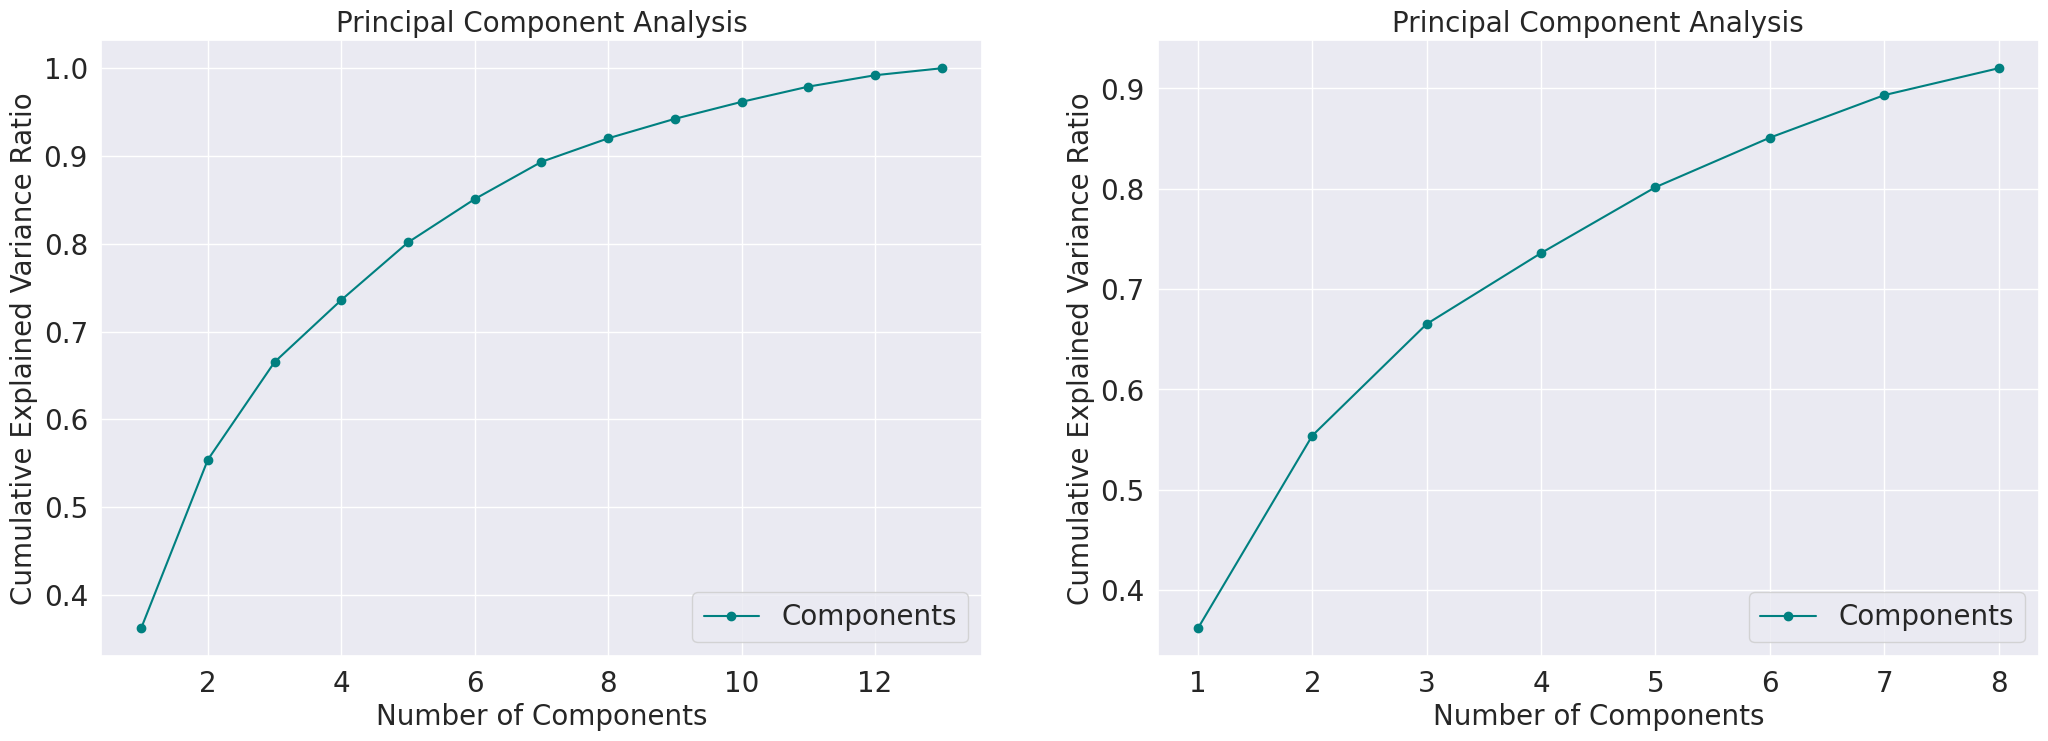

In [78]:
# Asılı olmayan dəyişənlərin eyni şkalaya salınması
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X = X)

# Prinsipyal Komponent Analiz alqoritmasının tətbiqi
pca = PCA(random_state = 42)
X_scaled_pca = pca.fit_transform(X = X_scaled)

# Prinsipyal Komponent Analiz alqoritmasına görə datasetin ümumi izah edilmə faizinin vizuallaşdırılması
plt.figure(figsize = (25, 8))
plt.subplot(1, 2, 1)
plt.plot(range(1, X_scaled_pca.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), label = 'Components', marker = 'o', color = 'teal')
plt.title(label = 'Principal Component Analysis', fontsize = 20)
plt.ylabel(ylabel = 'Cumulative Explained Variance Ratio', fontsize = 20)
plt.xlabel(xlabel = 'Number of Components', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Prinsipyal Komponent Analiz alqoritmasına görə datasetin ümumi izah edilmə faizinin vizuallaşdırılması
plt.subplot(1, 2, 2)
plt.plot(range(1, X_scaled_pca[:, :8].shape[1] + 1), pca.explained_variance_ratio_[:8].cumsum(), label = 'Components', marker = 'o', color = 'teal')
plt.title(label = 'Principal Component Analysis', fontsize = 20)
plt.ylabel(ylabel = 'Cumulative Explained Variance Ratio', fontsize = 20)
plt.xlabel(xlabel = 'Number of Components', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


***
#### Tapşırıq #3:
- Eyni şklaya salınmış asılı olmayan dəyişənlərdən səkkiz komponent yarat
- **features** adında asılı olmayan dəyişənlərdən ibarət list yarat

In [80]:
# Prinsipyal Komponent Analiz alqoritmasının tətbiqi
pca = PCA(n_components = 8, random_state = 42)

# Asılı olmayan dəyişənlərdən ibarət listin yaradılması
features = pca.fit_transform(X = X_scaled)

- Dirsək metodunu tətbiq et və vizuallaşdır

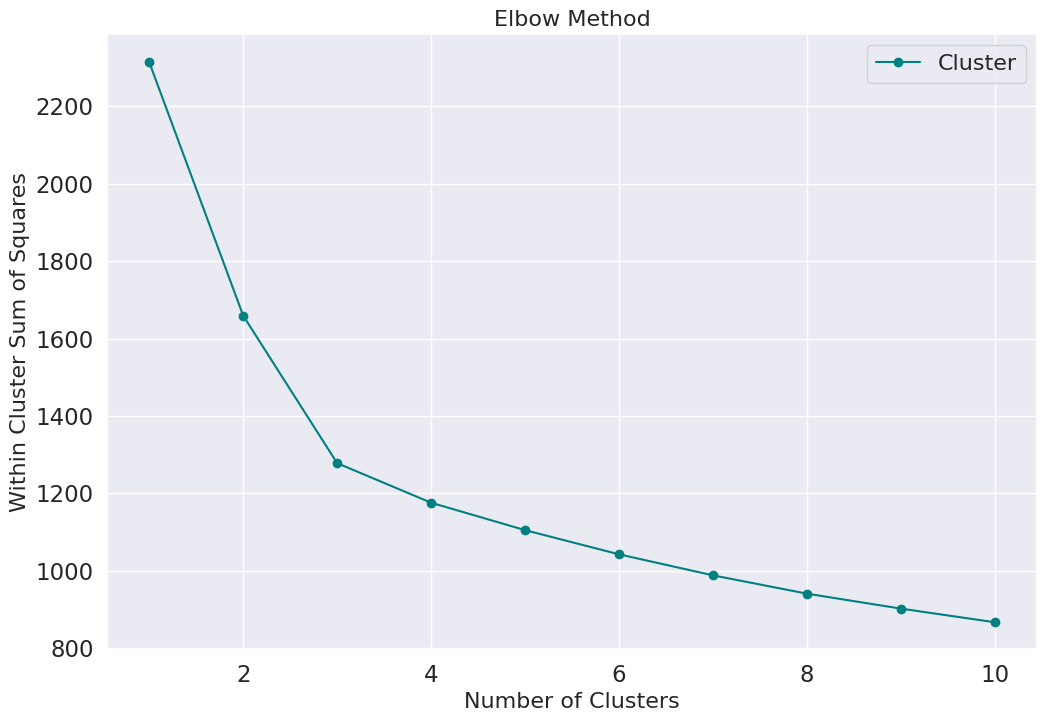

In [81]:
# Boş listin yaradılması
WCSS = []

# Döngü
for i in range(1, 11):
    # KMeans alqoritmasından ibarət modelin qurulması
    model = KMeans(n_clusters = i, random_state = 42)

    # Asılı olmayan dəyişənlərin modelə verilməsi
    model.fit(X = X_scaled_pca)

    # İnerşiyanın hesablanması
    inertia = model.inertia_

    # İnerşiyanın listə salınması
    WCSS.append(inertia)

# Dirsək metodunun vizuallaşdırılması
plt.figure(figsize = (12, 8))
plt.plot(range(1, 11), WCSS, marker = 'o', label = 'Cluster', c = 'teal')
plt.title(label = 'Elbow Method', fontsize = 16)
plt.ylabel(ylabel = 'Within Cluster Sum of Squares', fontsize = 16)
plt.xlabel(xlabel = 'Number of Clusters', fontsize = 16)
plt.legend(loc = 'upper right', fontsize = 16)
plt.show()

***
#### Tapşırıq #4:
- build_pipeline adında funksiya yarat və funksiyanın beş parametri olsun.
    1. **data_frame** - Asılı olmayan dəyişənlərin olduğu dataset
    2. **flat_clustering** - İstifadə olunacaq alqoritma düz və ya iyerarxik alqoritma olacaq ya yox
    3. **imputation_strategy** - Boş xanaların doldurulması üçün seçilən strategiya
    4. **n_components** - Prinsipyal Komponent Analiz alqoritması vasitəsi ilə yaradılacaq komponentlərin sayı
    5. **n_clusters** - Qurulacaq modeldə klasterlərin sayı
    


- Əgər **flat_clustering** parametri **True**-ya bərabərdirsə bu zaman **KMeans** əks təqdirdə **AgglomerativeClustering** alqoritmasından istifadə edilərək boru modeli qurulsun.
- Boru modeli qur və bu mərhələləri boru modelə daxil et
    1. Boş xanaların əvəzlənməsi
    2. Asılı olmayan dəyişənlərin eyni şkalaya salınması
    3. Prinsipyal Komponent Analiz alqoritmasının tətbiqi
    4. **flat_clustering** parametrinə əsasən klasterinq alqoritmasının tətbiqi
- Daha sonra dataseti modelə ver

In [82]:
# build_pipeline adında funksiyanın yaradılması
def build_pipeline(data_frame = None, flat_clustering = True, imputation_strategy = None, n_components = None, n_clusters = None):
    if flat_clustering:
        # Boru modelin qurulması
        imputer = SimpleImputer(strategy=imputation_strategy)
        scaler = StandardScaler()
        pca = PCA(n_components=n_components)
        clustering = KMeans(n_clusters=n_clusters)

        pipe = Pipeline(steps = [('imputation', imputer), ('scaling', scaler), ('pca', pca), ('clustering', clustering)])

        # Boru modelə datasetin verilməsi
        pipe.fit(X = data_frame)

        # Borunun geri qaytarılması
        return pipe
    else:
        imputer = SimpleImputer(strategy=imputation_strategy)
        scaler = StandardScaler()
        pca = PCA(n_components=n_components)
        clustering = AgglomerativeClustering(n_clusters=n_clusters)
        # Boru modelin qurulması
        pipe = Pipeline(steps = [('imputation', imputer), ('scaling', scaler), ('pca', pca), ('clustering', clustering)])

        # Boru model vasitəsi ilə klasterlərin proqnozlaşdırıması
        clusters = pipe.fit_predict(X = data_frame)

        # Borunun və proqnozlaşdırılan klasterlərin geri qaytarılması
        return pipe, clusters

- Düz klasterləşdirmə modelini qur, boş xanaları median ilə doldur, komponentlərin sayı səkkiz klasterlərin sayı isə üç olsun

In [85]:
# Funksiyanın çağırılması
kmeans = build_pipeline(features, flat_clustering=True, imputation_strategy='mean', n_components=8, n_clusters=3)

# Boru modelin arxitekturasının göstərilməsi
kmeans

Pipeline(steps=[('imputation', SimpleImputer()), ('scaling', StandardScaler()),
                ('pca', PCA(n_components=8)),
                ('clustering', KMeans(n_clusters=3))])

- Klasterləri proqnozlaşdır və həmin klasterləri datasetdə **flat_cluster** sütununu yaradıb ona ver

In [87]:
# Boru modelin proqnozlarının flat_cluster sütununa təyin olunması
df['flat_cluster'] = kmeans.predict(X = features)

# İlk beş sətirin göstərilməsi
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,flat_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


***
#### Tapşırıq #5:
- İyerarxik klasterləşdirmə modelini qur, boş xanaları median ilə doldur, komponentlərin sayı səkkiz klasterlərin sayı isə üç olsun

In [88]:
# Funksiyanın çağırılması
agglomerative, clusters = build_pipeline(features, flat_clustering=False, imputation_strategy='mean', n_components=8, n_clusters=3)

# Boru modelin arxitekturasının göstərilməsi
agglomerative

Pipeline(steps=[('imputation', SimpleImputer()), ('scaling', StandardScaler()),
                ('pca', PCA(n_components=8)),
                ('clustering', AgglomerativeClustering(n_clusters=3))])

- Klasterləri proqnozlaşdır və həmin klasterləri datasetdə **hierarchical_cluster** sütununu yaradıb ona ver

In [91]:
# Boru modelin proqnozlarının hierarchical_cluster sütununa təyin olunması
df['hierarchical_cluster'] = clusters

# İlk beş sətirin göstərilməsi
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,flat_cluster,hierarchical_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0


- Klasterləri **dendrogram** vasitəsi ilə vizuallaşdır

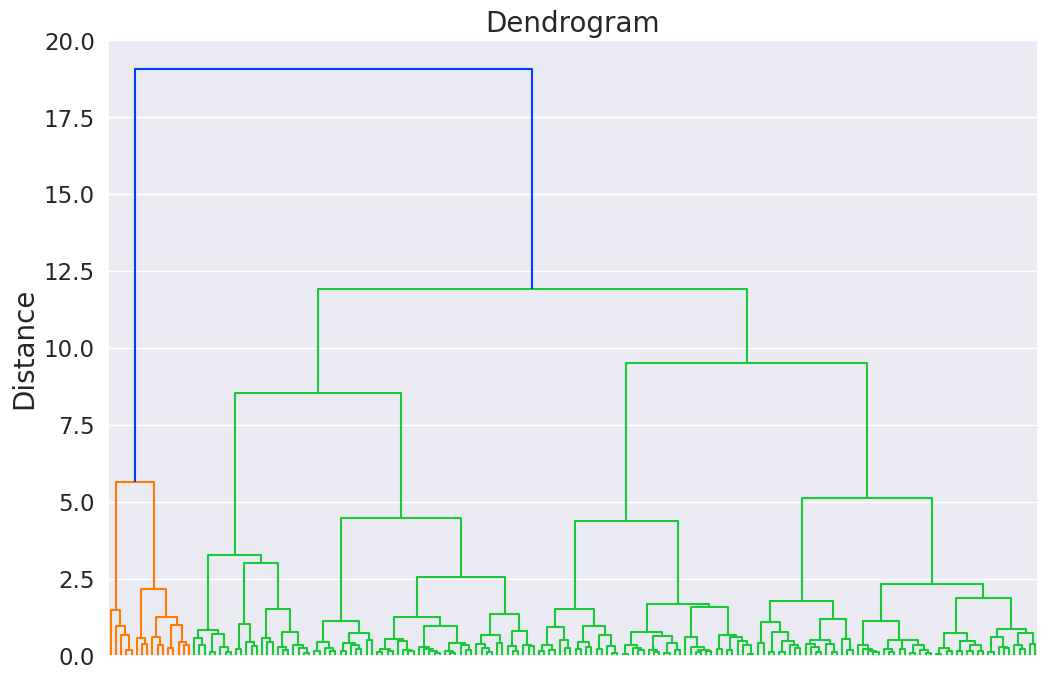

In [97]:
# İyerarxik klasterinq alqoritmasının Dendroqram ilə vizuallaşdırılması
dendrogram(Z = linkage(y = kmeans.transform(X = features), method = 'ward'), no_labels = True)
plt.title(label = 'Dendrogram', fontsize = 20)
plt.ylabel(ylabel = 'Distance', fontsize = 20)
plt.show()

- Modeli yaddaşa yaz

In [98]:
# Modelin pickle faylı kimi yaddaşa yazılması
with open('model.pkl', 'wb') as file:
      pickle.dump(model, file)